#  Unit 2.4a Using Programs with Data, SQLAlchemy
> Using Programs with Data is focused on SQL and database actions.  Part A focuses on SQLAlchemy and an OOP programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database and SQLAlchemy
> In this blog we will explore using programs with data, focused on Databases.  We will use SQLite Database to learn more about using Programs with Data.  ***Use Debugging through these examples to examine Objects created in Code***.

- College Board talks about ideas like 
    - Program Usage. "iterative and interactive way when processing information"
    - Managing Data.  "classifying data are part of the process in using programs", "data files in a Table"
    - Insight "insight and knowledge can be obtained from ...  digitally represented information"
    - Filter systems. 'tools for finding information and recognizing patterns"
    - Application. "the preserve has two databases", "an employee wants to count the number of book"

- PBL, Databases, Iterative/OOP
    - Iterative. Refers to a sequence of instructions or code being repeated until a specific end result is achieved
    - OOP. A computer programming model that organizes software design around data, or objects, rather than functions and logic
    - SQL. Structured Query Language, abbreviated as SQL, is a language used in programming, managing, and structuring data 


## Imports and Flask Objects
> Defines and key object creations

- Comment on where you have observed these working?  Provide a defintion of purpose.
    1. Flask app object, **we have used this for our backend and API for our projects**
    2. SQLAlchemy db object **We have used this for tables and to store data**

**Purpose - purpose in a program means to solve a problem or to pursue an interest through creative expression**


In [7]:
"""
These imports define the key objects
"""

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

"""
These object and definitions are used throughout the Jupyter Notebook.
"""

# Setup of key Flask object (app)
app = Flask(__name__)
# Setup SQLAlchemy object and properties for the database (db)
database = 'sqlite:///sqlite.db'  # path and filename of database
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
app.config['SQLALCHEMY_DATABASE_URI'] = database
app.config['SECRET_KEY'] = 'SECRET_KEY'
db = SQLAlchemy()


# This belongs in place where it runs once per project
db.init_app(app)


## Model Definition
> Define columns, initialization, and CRUD methods for users table in sqlite.db

- Comment on these items in the class, purpose and defintion.
    - class User
    - db.Model inheritance
    - _init_ method
    - ```@property```, ```@<column>.setter```
    - create, read, update, delete methods

In [8]:
""" database dependencies to support sqlite examples """
import datetime
from datetime import datetime
import json

from sqlalchemy.exc import IntegrityError
from werkzeug.security import generate_password_hash, check_password_hash


''' Tutorial: https://www.sqlalchemy.org/library.html#tutorials, try to get into a Python shell and follow along '''

# Define the User class to manage actions in the 'users' table
# -- Object Relational Mapping (ORM) is the key concept of SQLAlchemy
# -- a.) db.Model is like an inner layer of the onion in ORM
# -- b.) User represents data we want to store, something that is built on db.Model
# -- c.) SQLAlchemy ORM is layer on top of SQLAlchemy Core, then SQLAlchemy engine, SQL
class User(db.Model):
    __tablename__ = 'users'  # table name is plural, class name is singular

    # Define the User schema with "vars" from object
    id = db.Column(db.Integer, primary_key=True)
    _name = db.Column(db.String(255), unique=False, nullable=False)
    _uid = db.Column(db.String(255), unique=True, nullable=False)
    _password = db.Column(db.String(255), unique=False, nullable=False)
    _dob = db.Column(db.Date)

    # constructor of a User object, initializes the instance variables within object (self)
    def __init__(self, name, uid, password="123qwerty", dob=datetime.today()):
        self._name = name    # variables with self prefix become part of the object, 
        self._uid = uid
        self.set_password(password)
        if isinstance(dob, str):  # not a date type     
            dob = date=datetime.today()
        self._dob = dob

    # a name getter method, extracts name from object
    @property
    def name(self):
        return self._name
    
    # a setter function, allows name to be updated after initial object creation
    @name.setter
    def name(self, name):
        self._name = name
    
    # a getter method, extracts uid from object
    @property
    def uid(self):
        return self._uid
    
    # a setter function, allows uid to be updated after initial object creation
    @uid.setter
    def uid(self, uid):
        self._uid = uid
        
    # check if uid parameter matches user id in object, return boolean
    def is_uid(self, uid):
        return self._uid == uid
    
    @property
    def password(self):
        return self._password[0:10] + "..." # because of security only show 1st characters

    # update password, this is conventional method used for setter
    def set_password(self, password):
        """Create a hashed password."""
        self._password = generate_password_hash(password, method='sha256')

    # check password parameter against stored/encrypted password
    def is_password(self, password):
        """Check against hashed password."""
        result = check_password_hash(self._password, password)
        return result
    
    # dob property is returned as string, a string represents date outside object
    @property
    def dob(self):
        dob_string = self._dob.strftime('%m-%d-%Y')
        return dob_string
    
    # dob setter, verifies date type before it is set or default to today
    @dob.setter
    def dob(self, dob):
        if isinstance(dob, str):  # not a date type     
            dob = date=datetime.today()
        self._dob = dob
    
    # age is calculated field, age is returned according to date of birth
    @property
    def age(self):
        today = datetime.today()
        return today.year - self._dob.year - ((today.month, today.day) < (self._dob.month, self._dob.day))
    
    # output content using str(object) is in human readable form
    # output content using json dumps, this is ready for API response
    def __str__(self):
        return json.dumps(self.read())

    # CRUD create/add a new record to the table
    # returns self or None on error
    def create(self):
        try:
            # creates a person object from User(db.Model) class, passes initializers
            db.session.add(self)  # add prepares to persist person object to Users table
            db.session.commit()  # SqlAlchemy "unit of work pattern" requires a manual commit
            return self
        except IntegrityError:
            db.session.remove()
            return None

    # CRUD read converts self to dictionary
    # returns dictionary
    def read(self):
        return {
            "id": self.id,
            "name": self.name,
            "uid": self.uid,
            "dob": self.dob,
            "age": self.age,
        }

    # CRUD update: updates user name, password, phone
    # returns self
    def update(self, name="", uid="", password=""):
        """only updates values with length"""
        if len(name) > 0:
            self.name = name
        if len(uid) > 0:
            self.uid = uid
        if len(password) > 0:
            self.set_password(password)
        db.session.add(self) # performs update when id exists
        db.session.commit()
        return self

    # CRUD delete: remove self
    # None
    def delete(self):
        db.session.delete(self)
        db.session.commit()
        return None

# Notes and Comments about the following terms in the code
- Class User: class definition is often called a template, template definition for the property, properties that we want to have, 
- db.model: way you inherit users in your db Model
- init: method works automatically when you prefix something, receives parameters and initializes attributes inside of our class, template is just code, an object shows up in our debugger.
- Setter and getters allows you to change the values of attributes inside your object, or retrieve. Getter retrieve and setters changes the value that was initialize.
- Create, Read, Update, Delete, common method for databases, methods for them to help us interact with data in our object and perform the CRUD

## Initial Data
> Uses SQLALchemy db.create_all() to initialize rows into sqlite.db

- Comment on how these work?
 1. Create All Tables from db Object
    
**db Object is organized in a structured manner. Create All tables creates the table.**

2. User Object Constructors

**User object constructors ensures model users are consistent and be used various of times.**

3. Try / Except 

**This accounts for error.**

In [13]:
"""Database Creation and Testing """


# Builds working data for testing
def initUsers():
    with app.app_context():
        """Create database and tables"""
        db.create_all()
        """Tester data for table"""
        u1 = User(name='Thomas Edison', uid='toby', password='123toby', dob=datetime(1847, 2, 11))
        u2 = User(name='Nikola Tesla', uid='niko', password='123niko')
        u3 = User(name='Alexander Graham Bell', uid='lex', password='123lex')
        u4 = User(name='Eli Whitney', uid='whit', password='123whit')
        u5 = User(name='Indiana Jones', uid='indi', dob=datetime(1920, 10, 21))
        u6 = User(name='Marion Ravenwood', uid='raven', dob=datetime(1921, 10, 21))


        users = [u1, u2, u3, u4, u5, u6]

        """Builds sample user/note(s) data"""
        for user in users:
            try:
                '''add user to table'''
                object = user.create()
                print(f"Created new uid {object.uid}")
            except:  # error raised if object nit created
                '''fails with bad or duplicate data'''
                print(f"Records exist uid {user.uid}, or error.")
                
initUsers()

## Check for given Credentials in users table in sqlite.db
> Use of ORM Query object and custom methods to identify user to credentials uid and password

- Comment on purpose of following
    1. User.query.filter_by

**filters with the parameter, parameter is uid, so filters by username ids**

    2. user.password

**Checks if password is correct, if yes, returns true, if not, returns false**

ORM(Object Relational Model) - in SQLAlchemy, ORM on top of the python that works with databases

Credentials check, query for the username and password


In [10]:
# SQLAlchemy extracts single user from database matching User ID
def find_by_uid(uid):
    with app.app_context():
        user = User.query.filter_by(_uid=uid).first()
    return user # returns user object

# Check credentials by finding user and verify password
def check_credentials(uid, password):
    # query email and return user record
    user = find_by_uid(uid)
    if user == None:
        return False
    if (user.is_password(password)):
        return True
    return False
        
#check_credentials("indi", "123qwerty")

## Create a new User in table in Sqlite.db
> Uses SQLALchemy and custom user.create() method to add row.

- Comment on purpose of following
1. user.find_by_uid() and try/except

**User find by uid finds user by their usernames, checks through usernames until matches the same one input, if not, it passes or keeps going**

2. user = User(...)

**This initializes the user object before date, getting the name, uid, and password first**

3. user.dob and try/except

**enter user's date of birth, looks for one that matches with the try function, if not, goes to except with keeps going through all, if none can be found then it prints invalid date**

4. user.create() and try/except

**Creates a new user for the database, if try works then prints new user was created, except will happen if error occurred while creating new user**


In [11]:
# Inputs, Try/Except, and SQLAlchemy work together to build a valid database object
def create():
    # optimize user time to see if uid exists
    uid = input("Enter your user id:")
    user = find_by_uid(uid)
    try:
        print("Found\n", user.read())
        return
    except:
        pass # keep going
    
    # request value that ensure creating valid object
    name = input("Enter your name:")
    password = input("Enter your password")
    
    # Initialize User object before date
    user = User(name=name, 
                uid=uid, 
                password=password
                )
    
    # create user.dob, fail with today as dob
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    try:
        user.dob = datetime.strptime(dob, '%Y-%m-%d').date()
    except ValueError:
        user.dob = datetime.today()
        print(f"Invalid date {dob} require YYYY-mm-dd, date defaulted to {user.dob}")
           
    # write object to database
    with app.app_context():
        try:
            object = user.create()
            print("Created\n", object.read())
        except:  # error raised if object not created
            print("Unknown error uid {uid}")
        
create()

Created
 {'id': 7, 'name': 'Nicolas', 'uid': 'nicolasm', 'dob': '07-19-2005', 'age': 17}


## Reading users table in sqlite.db
> Uses SQLALchemy query.all method to read data

- Comment on purpose of following
1. User.query.all

**this is extracting all users from database and turns them into JSON**

2. json_ready assignment, google List Comprehension

**comprehends each user reading it, then adding it to the list.**


In [12]:

# SQLAlchemy extracts all users from database, turns each user into JSON
def read():
    with app.app_context():
        table = User.query.all()
    json_ready = [user.read() for user in table] # "List Comprehensions", for each user add user.read() to list
    return json_ready

read()

[{'id': 1,
  'name': 'Thomas Edison',
  'uid': 'toby',
  'dob': '02-11-1847',
  'age': 176},
 {'id': 2,
  'name': 'Nikola Tesla',
  'uid': 'niko',
  'dob': '03-21-2023',
  'age': 0},
 {'id': 3,
  'name': 'Alexander Graham Bell',
  'uid': 'lex',
  'dob': '03-21-2023',
  'age': 0},
 {'id': 4,
  'name': 'Eli Whitney',
  'uid': 'whit',
  'dob': '03-21-2023',
  'age': 0},
 {'id': 5,
  'name': 'Indiana Jones',
  'uid': 'indi',
  'dob': '10-21-1920',
  'age': 102},
 {'id': 6,
  'name': 'Marion Ravenwood',
  'uid': 'raven',
  'dob': '10-21-1921',
  'age': 101},
 {'id': 7,
  'name': 'Nicolas',
  'uid': 'nicolasm',
  'dob': '07-19-2005',
  'age': 17}]

# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- Change blog to your own database.
- Add additional CRUD
    - Add Update functionality to this blog.
    - Add Delete functionality to this blog.

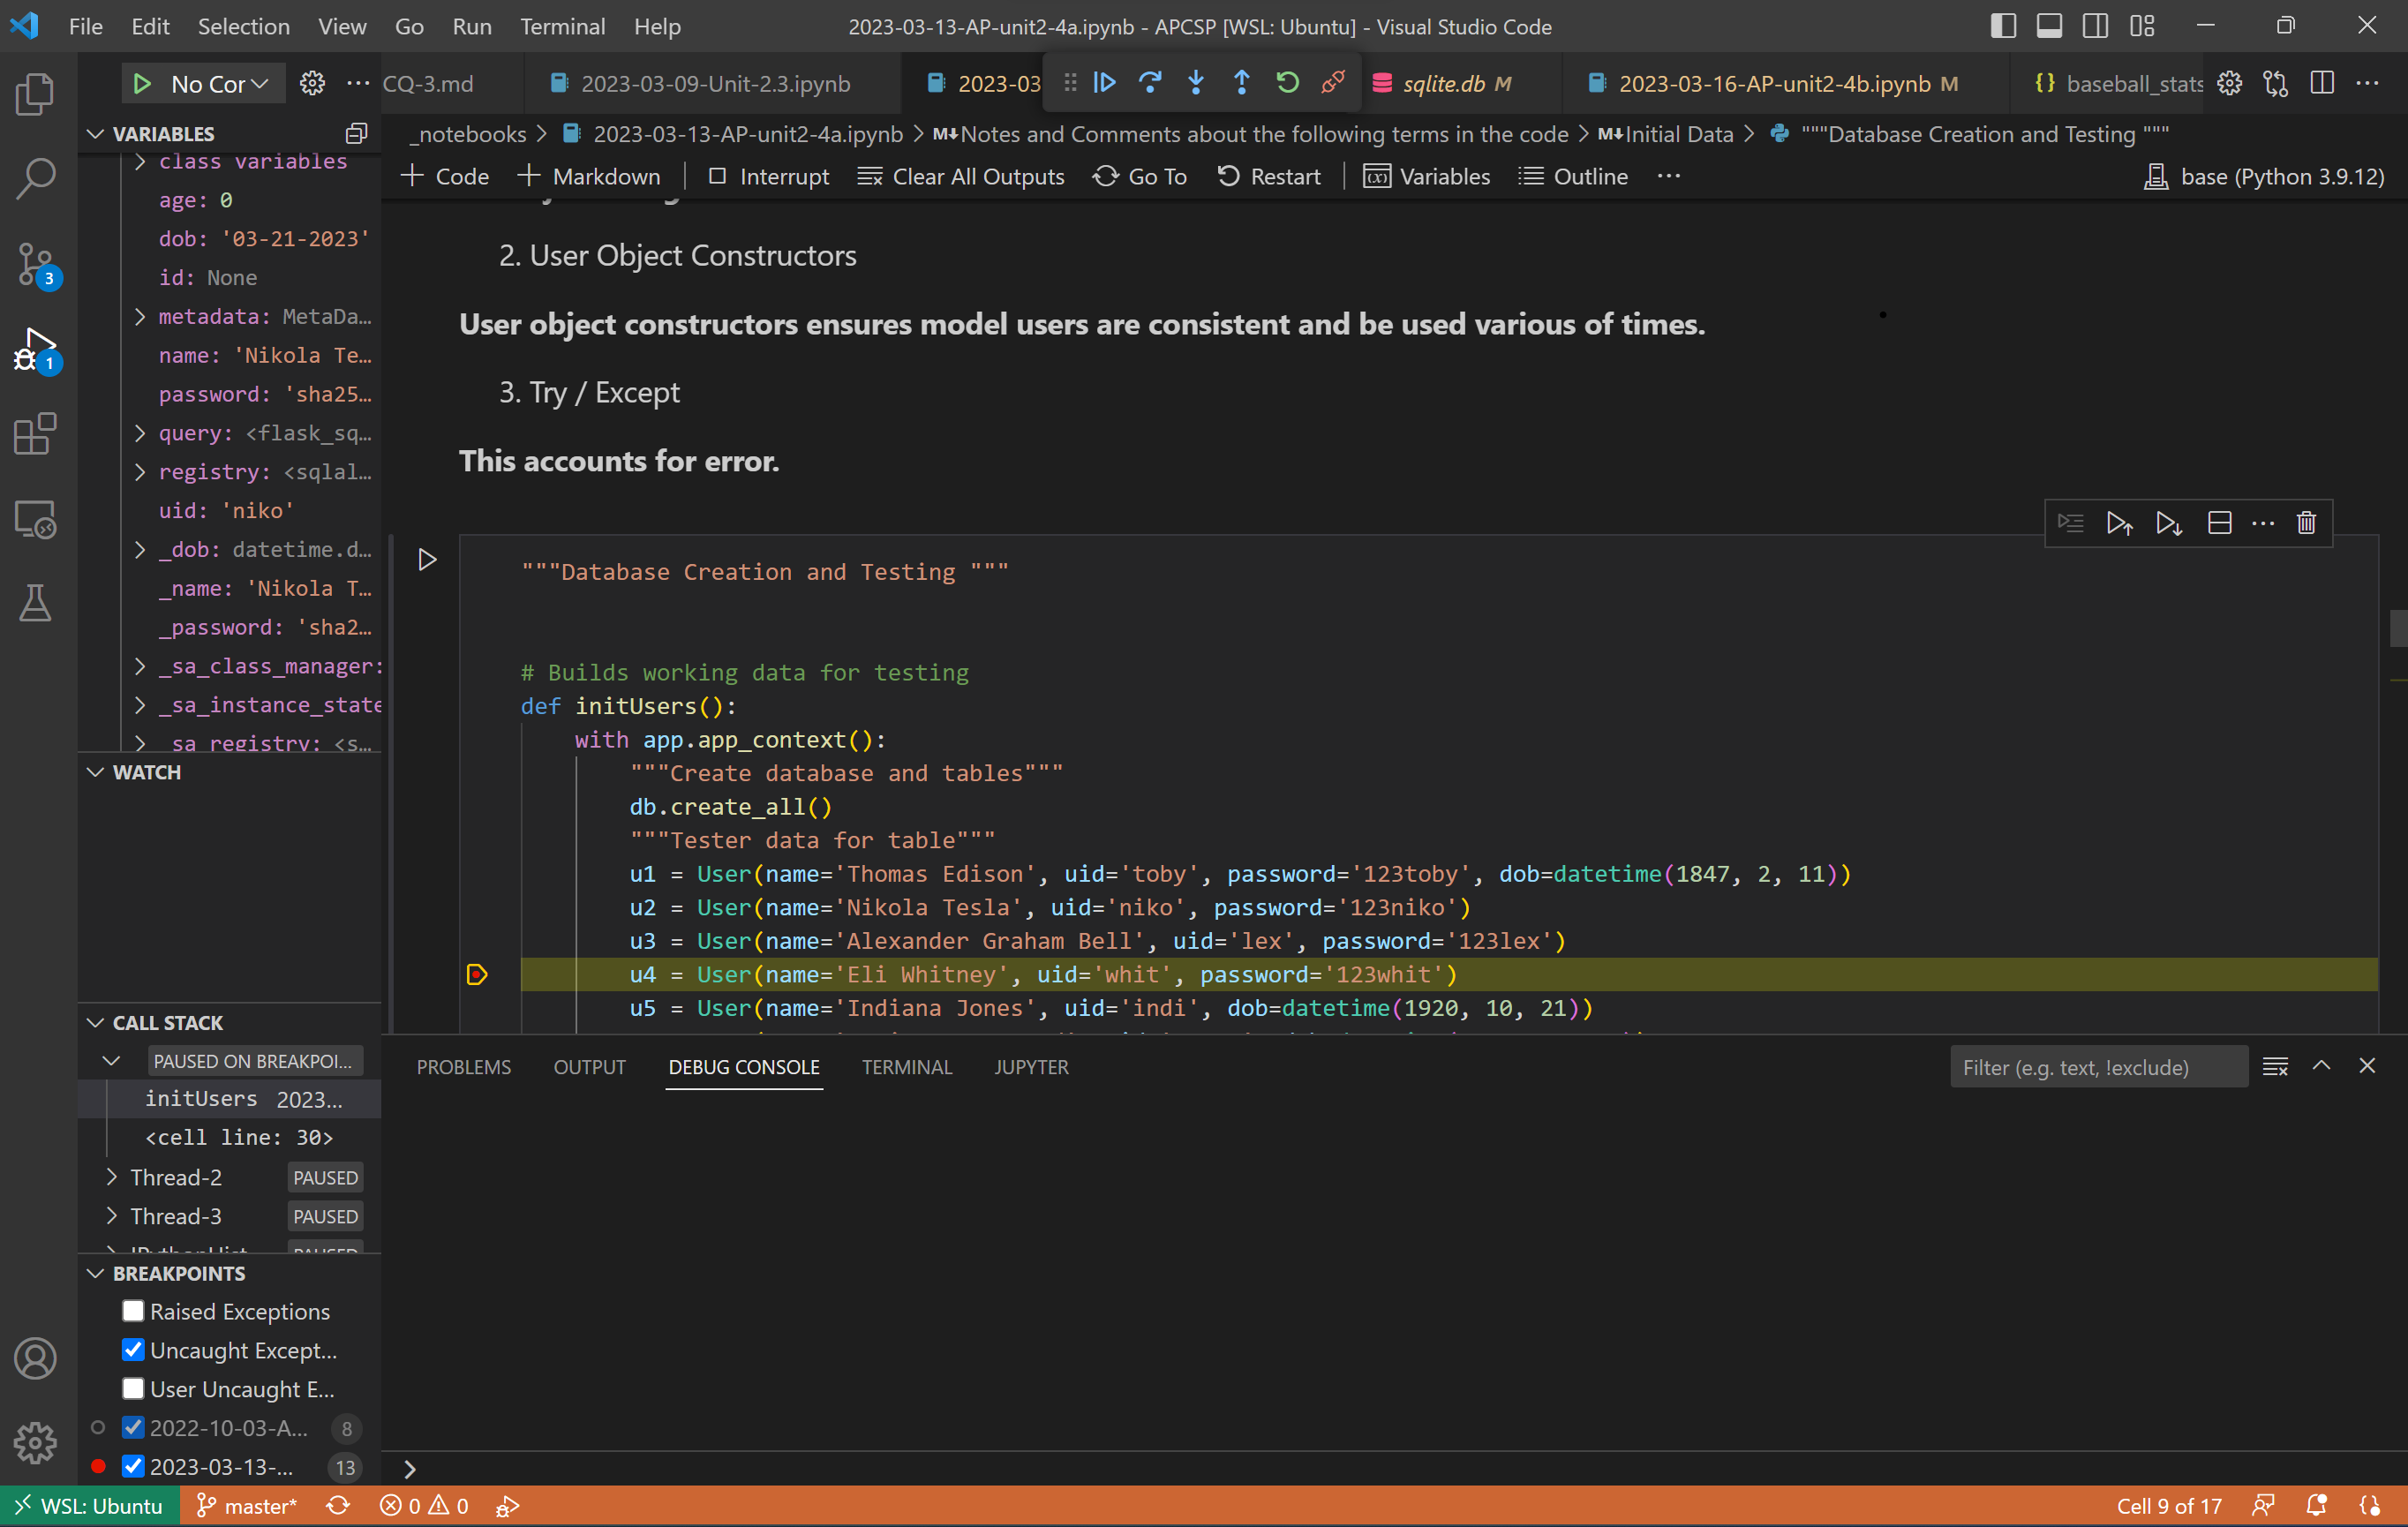